In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import itertools 
from itertools import permutations,combinations
import seaborn as sns
from collections import defaultdict

In [2]:
pip install markov-model-attribution

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import markov_model_attribution as mma

In [4]:
# sample run

df = pd.DataFrame({'Paths':['start > cone > ctwo > cthree > conv',
                           'start > cone > null',
                           'start > ctwo > cthree > null']})

In [5]:
model = mma.run_model(paths = df)
A = model['markov_conversions']

print(A)

{'cthree': 0.4, 'ctwo': 0.4, 'cone': 0.2}


- Comparing the Markov Model with all SAPs user journey vs the Markov Model with only Client Conversion Journey

In [6]:
# importing the data with all SAPs user journeys

df_all = pd.read_csv('markov_paths_MQL.csv')
df_all

,path
0,start > Organic Search > Paid Search > null
1,start > Direct > Direct > Direct > Direct > Re...
2,start > Organic Search > Organic Search > null
3,start > Organic Search > Organic Search > Orga...
4,start > Organic Search > Organic Search > null
...,...
12617,start > Referral > null
12618,start > Referral > null
12619,start > Referral > null
12620,start > Organic Search > null


In [7]:
# importing the data with Only Client's user journeys

df_client = pd.read_csv('markov_paths_conversion_submission_last_touch.csv')
df_client 

,path
0,start > Organic Search > conv
1,start > Organic Search > conv
2,start > Organic Search > conv
3,start > Organic Search > Organic Search > conv
4,start > Organic Search > conv
...,...
864,start > Organic Search > conv
865,start > Direct > conv
866,start > Paid Search > conv
867,start > Direct > Organic Search > Direct > Pai...


In [8]:
model_1 = mma.run_model(paths = df_all)
A = model_1['markov_conversions']

Attribution_array_1 = pd.DataFrame(list(A.items()), columns = ['Channels', 'Values1'])

Total1 = Attribution_array_1['Values1'].sum(axis = 0)

Attribution_array_1 = Attribution_array_1.assign(Percentage1 =lambda x: round((x['Values1']/Total1 *100),2))
Attribution_array_1

,Channels,Values1,Percentage1
0,Direct,144.095600,16.83
1,Email,4.359319,0.51
2,Organic Search,417.923649,48.82
3,Display,0.902547,0.11
4,InApp,0.035514,0.00
5,Organic Social,4.776563,0.56
6,Paid Social,0.899561,0.11
7,Other,1.310064,0.15
8,Paid Search,140.600050,16.43
9,Referral,141.097133,16.48


In [9]:
model_2 = mma.run_model(paths = df_client)

B = model_2['markov_conversions']

Attribution_array_2 = pd.DataFrame(list(B.items()), columns = ['Channels', 'Values2'])

Total2 = Attribution_array_2['Values2'].sum(axis = 0)

Attribution_array_2 = Attribution_array_2.assign(Percentage2= lambda x: round((x['Values2']/Total2 *100),2))
Attribution_array_2

,Channels,Values2,Percentage2
0,Direct,144.597418,16.66
1,Email,2.504789,0.29
2,Organic Search,440.040748,50.70
3,Organic Social,4.185758,0.48
4,Paid Social,0.838156,0.10
5,Paid Search,138.159269,15.92
6,Referral,137.673862,15.86


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Email'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Display'),
  Text(4, 0, 'InApp'),
  Text(5, 0, 'Organic Social'),
  Text(6, 0, 'Paid Social'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Paid Search'),
  Text(9, 0, 'Referral')])

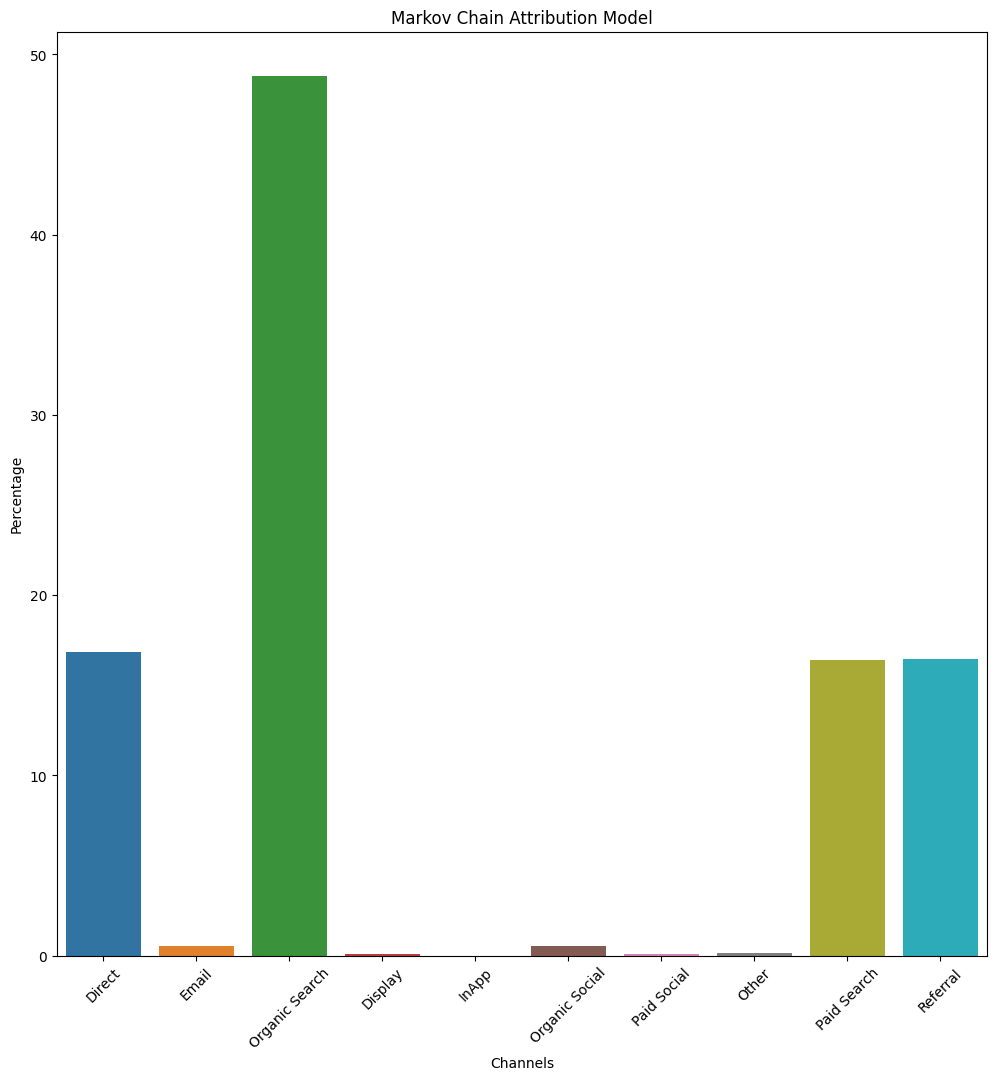

In [10]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x = 'Channels', y = 'Percentage1', data = Attribution_array_1).set_title('Markov Chain Attribution Model')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Email'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Organic Social'),
  Text(4, 0, 'Paid Social'),
  Text(5, 0, 'Paid Search'),
  Text(6, 0, 'Referral')])

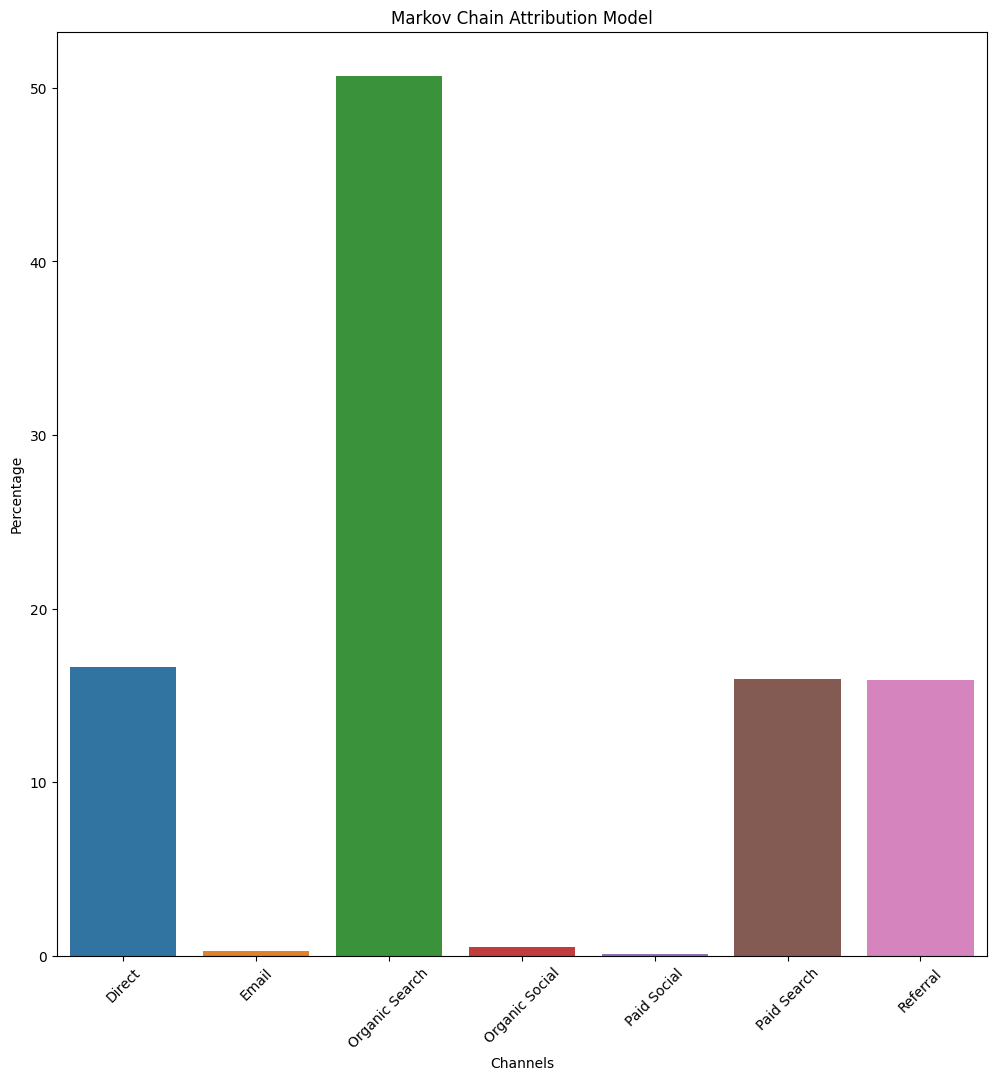

In [11]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x = 'Channels', y = 'Percentage2', data = Attribution_array_2).set_title('Markov Chain Attribution Model')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)

In [12]:
Attribution_array_markov = Attribution_array_1.merge(Attribution_array_2, how = 'left', on = 'Channels')
Attribution_array_markov

,Channels,Values1,Percentage1,Values2,Percentage2
0,Direct,144.095600,16.83,144.597418,16.66
1,Email,4.359319,0.51,2.504789,0.29
2,Organic Search,417.923649,48.82,440.040748,50.70
3,Display,0.902547,0.11,NaN,NaN
4,InApp,0.035514,0.00,NaN,NaN
5,Organic Social,4.776563,0.56,4.185758,0.48
6,Paid Social,0.899561,0.11,0.838156,0.10
7,Other,1.310064,0.15,NaN,NaN
8,Paid Search,140.600050,16.43,138.159269,15.92
9,Referral,141.097133,16.48,137.673862,15.86


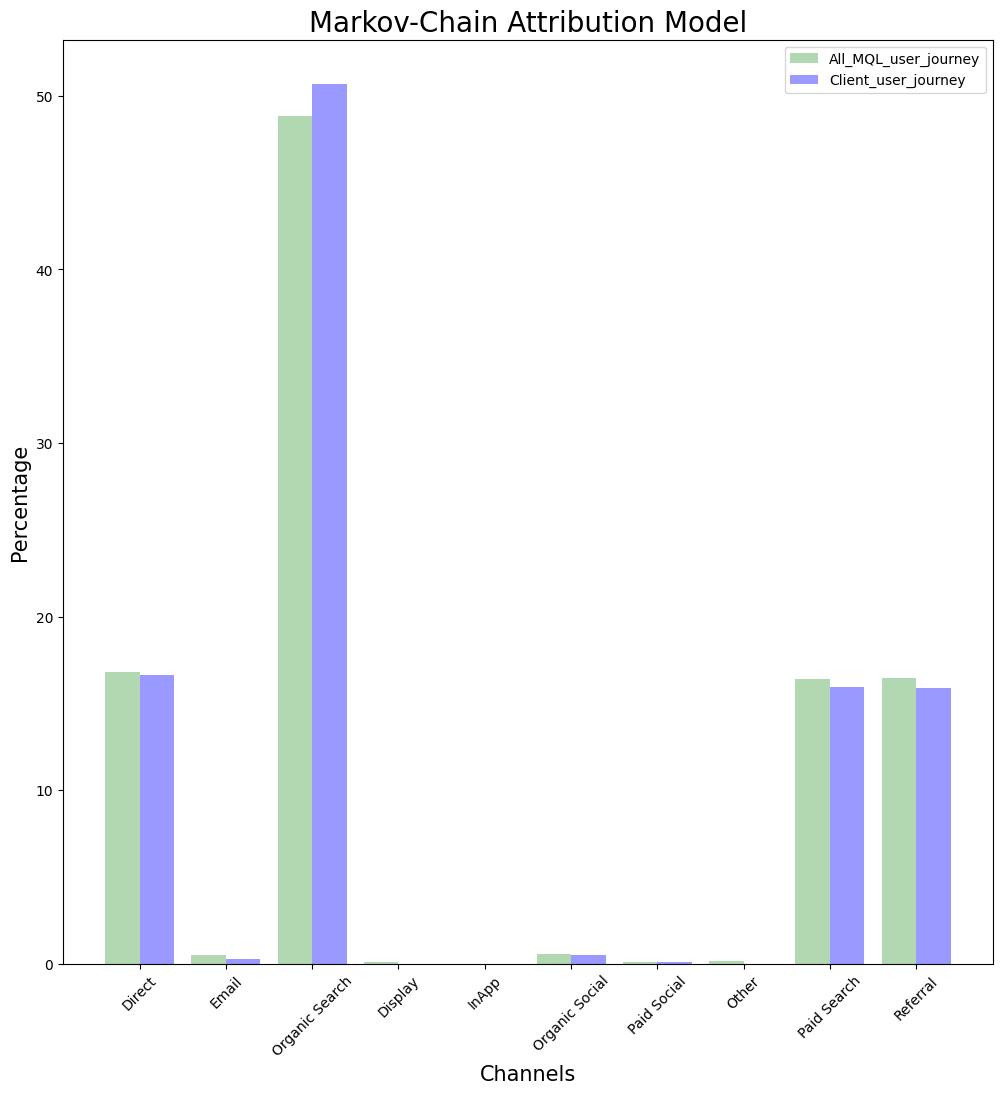

In [13]:
plt.figure(figsize = (12,12))
x_axis = np.arange(len(Attribution_array_markov['Channels']))
plt.bar(x_axis - 0.2, Attribution_array_markov['Percentage1'], width = 0.4, label = 'All_MQL_user_journey', color = 'green', alpha = 0.3)
plt.bar(x_axis + 0.2, Attribution_array_markov['Percentage2'], width = 0.4, label = 'Client_user_journey', color = 'blue', alpha = 0.4)
plt.xticks(x_axis, Attribution_array_markov['Channels'], rotation = 45)
plt.title('Markov-Chain Attribution Model', fontsize = 20)
plt.xlabel('Channels', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.legend()
plt.show()